In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pycbc
import gwpy

%matplotlib inline

## Fourier Transformation

In [5]:
def base_wav(
    wave:str,
    start:float,
    end:float,
    amp:float=1,
    f:float=1,
    phase_shift:float=0,
    fs:int=1024,
):
    times = np.arange(start, end, 1/fs)
    phase = 2*np.pi*f * times
    if wave == 'sin':
        wav = amp * np.sin(phase + phase_shift)
    if wave == 'cos':
        wav = amp * np.cos(phase + phase_shift)
    return times, wav

def signal(
    start:float,
    end:float,
    amplitudes:dict,
    modes:dict,
    phases:dict,
    fs:int=1024,
):
    times = np.arange(start, end, 1/fs) 
    signal = np.zeros(len(times))
    for wave in ('sin', 'cos'):
        if len(amplitudes[wave]) != 0 \
        and len(modes[wave]) != 0 \
        and len(phases[wave]) != 0:
            for amp, f, phase_shift in zip(amplitudes[wave], modes[wave], phases[wave]):
                _, sig = base_wav(
                    wave=wave,
                    start=start,
                    end=end,
                    amp=amp,
                    f=f,
                    phase_shift=phase_shift,
                    fs=fs,
                )
                signal += sig

    return times, signal

def gaussian(
    start:float,
    end:float,
    loc:float=0,
    scale:float=1,
    fs:int=1024,
):
    times = np.arange(start, end, 1/fs)
    signal = np.random.normal(loc=loc, scale=scale, size=len(times))
    return times, signal

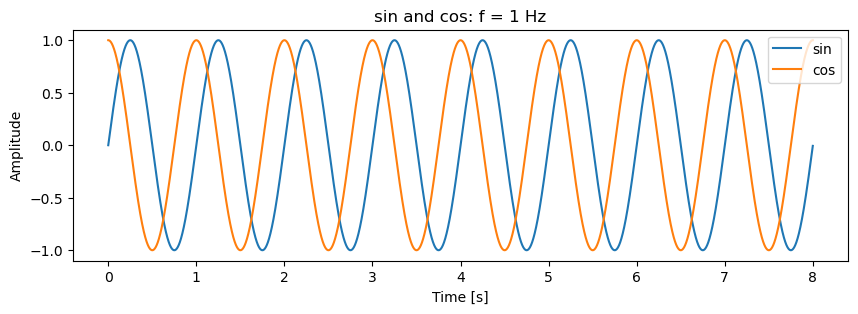

In [6]:
start = 0
end = 8
amp = 1
f = 1
phase_shift = 0
fs = 1024
times_sin, sin_wave = base_wav(
    wave='sin',
    start=start,
    end=end,
    amp=amp,
    f=f,
    phase_shift=phase_shift,
    fs=fs,
)
times_cos, cos_wave = base_wav(
    wave='cos',
    start=start,
    end=end,
    amp=amp,
    f=f,
    phase_shift=phase_shift,
    fs=fs,
)

plt.figure(figsize=[10,3])
plt.title(f"sin and cos: f = {f} Hz")
plt.plot(times_sin, sin_wave, label='sin')
plt.plot(times_cos, cos_wave, label='cos')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

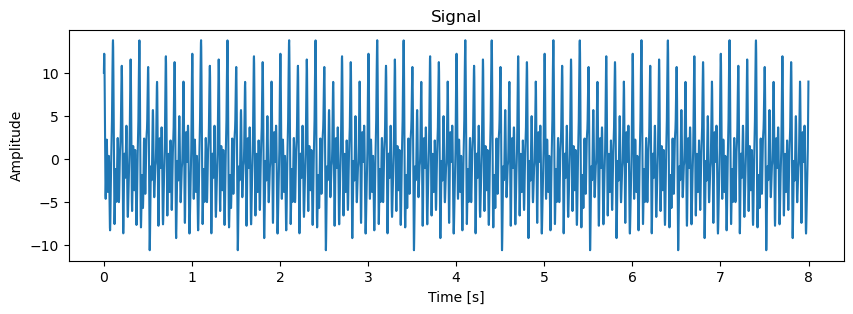

In [7]:
amplitudes = {
    "cos":[3, 5, 2],
    "sin":[1, 2, 3],
}
modes = {
    "cos":[10, 20, 30],
    "sin":[11, 13, 40],
}
phases = {
    "cos":[0, 0, 0],
    "sin":[0, 0, 0],
}

times, sig = signal(
    start=0,
    end=8,
    amplitudes=amplitudes,
    modes=modes,
    phases=phases,
)
plt.figure(figsize=[10,3])
plt.title(f"Signal")
plt.plot(times, sig)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

4097
[-1.23332455e-11+0.00000000e+00j -4.32002369e-12+2.05246576e-13j
 -5.54107772e-12-1.16848990e-12j ...  5.96869311e-12-1.01551730e-12j
 -1.70562691e-12-1.80670180e-12j  1.48325796e-12+0.00000000e+00j]


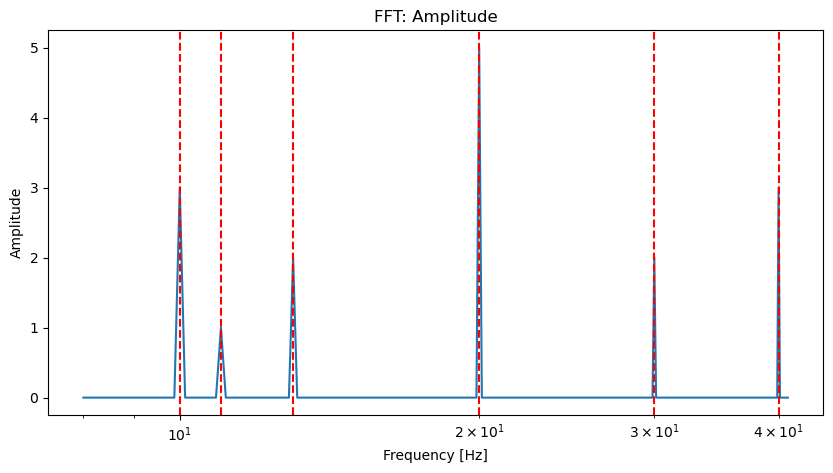

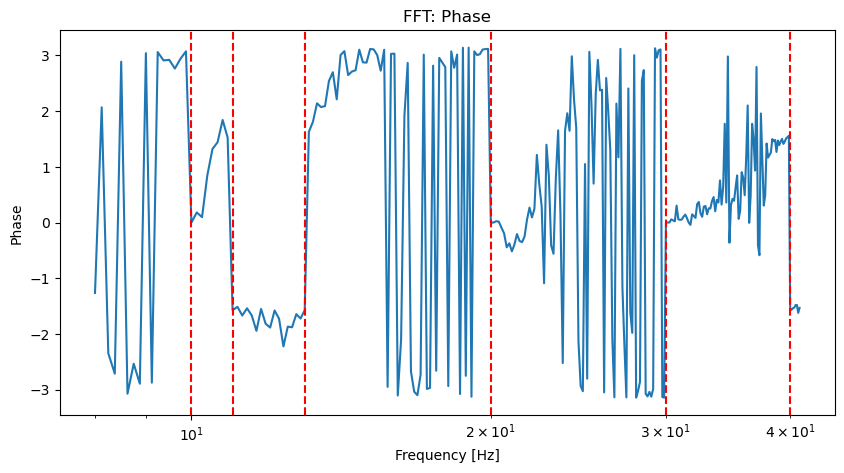

In [8]:
fs = 1024
sig_f = np.fft.rfft(sig)
print(len(sig_f))
print(sig_f)
df = 1/(len(times)/fs)

f_view = [8, 41]
frequencies = np.arange(0, fs/2 + df, df)
fst = int(f_view[0]/df)
fed = int(f_view[1]/df)
plt.figure(figsize=[10,5])
plt.title("FFT: Amplitude")
plt.plot(frequencies[fst:fed], np.abs(sig_f[fst:fed])/len(frequencies))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.xscale('log')
for wave in ['cos', 'sin']:
    for amp, f in zip(amplitudes[wave], modes[wave]):
        if amp != 0:
            plt.axvline(f, c='red', lw=1.5, ls='--')

plt.show()

plt.figure(figsize=[10,5])
plt.title("FFT: Phase")
plt.plot(frequencies[fst:fed], np.angle(sig_f[fst:fed]))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase")
plt.xscale('log')
for wave in ['cos', 'sin']:
    for amp, f in zip(amplitudes[wave], modes[wave]):
        if amp != 0:
            plt.axvline(f, c='red', lw=1.5, ls='--')

plt.show()

## Gaussian Noise

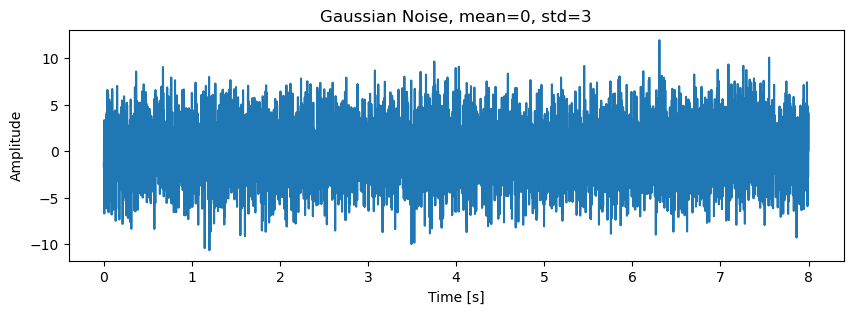

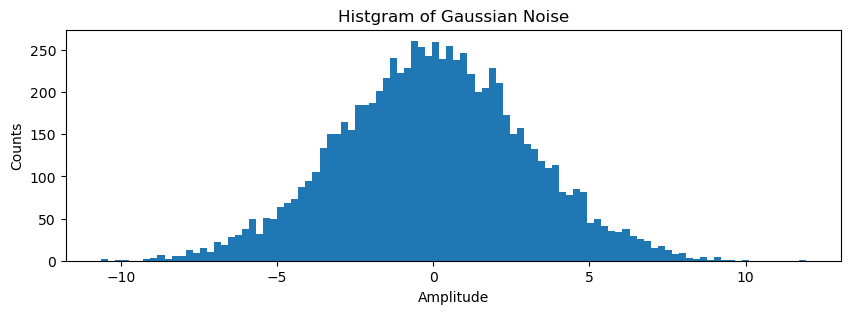

In [9]:
start = 0
end = 8
loc = 0
scale = 3

times, g_sig = gaussian(
    start=start,
    end=end,
    loc=loc,
    scale=scale,
)

plt.figure(figsize=[10,3])
plt.title(f"Gaussian Noise, mean={loc}, std={scale}")
plt.plot(times, g_sig)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=[10,3])
plt.title("Histgram of Gaussian Noise")
plt.hist(g_sig, bins=100)
plt.xlabel("Amplitude")
plt.ylabel("Counts")
plt.show()

4097
[ -49.05421593  +0.j          -93.34500399 +68.99399819j
 -113.42103721+364.0446261j  ... -243.10553554 +91.93530187j
   86.21845907+141.58159411j  319.59662684  +0.j        ]


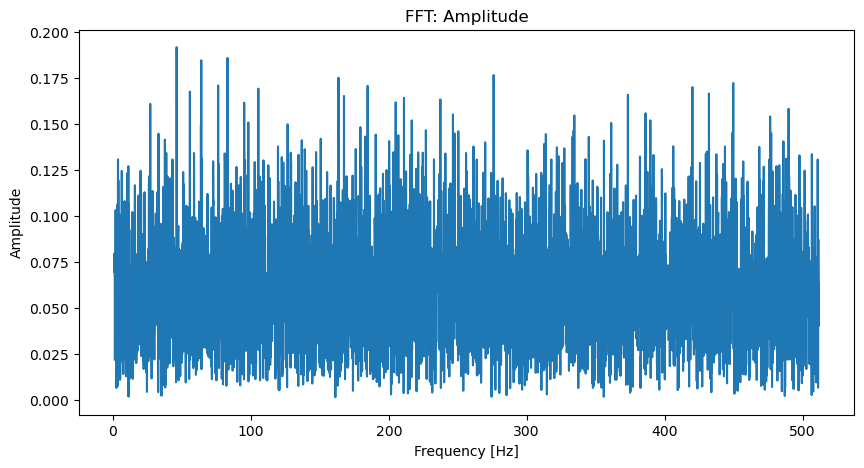

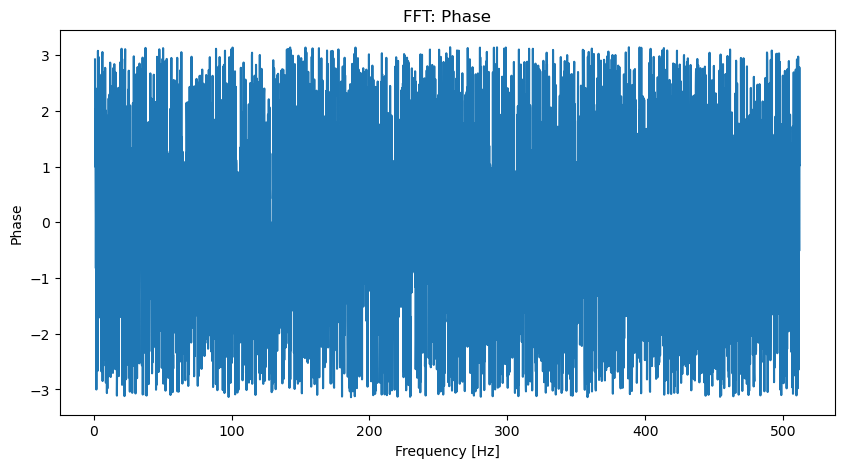

In [10]:
fs = 1024
sig_f = np.fft.rfft(g_sig)
print(len(sig_f))
print(sig_f)
df = 1/(len(times)/fs)

f_view = [1, 512]
frequencies = np.arange(0, fs/2 + df, df)
fst = int(f_view[0]/df)
fed = int(f_view[1]/df)
plt.figure(figsize=[10,5])
plt.title("FFT: Amplitude")
plt.plot(frequencies[fst:fed], np.abs(sig_f[fst:fed])/len(frequencies))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=[10,5])
plt.title("FFT: Phase")
plt.plot(frequencies[fst:fed], np.angle(sig_f[fst:fed]))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase")
plt.show()

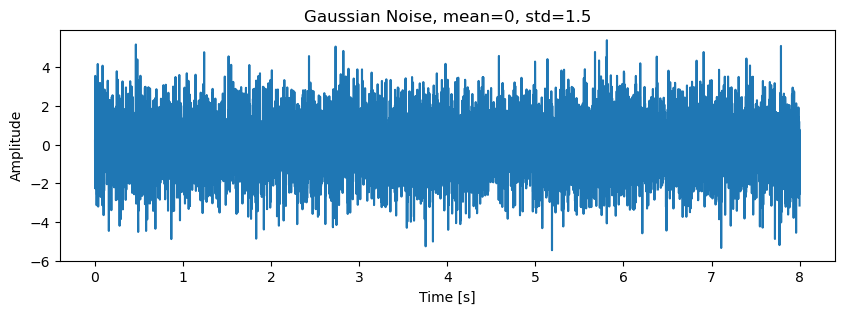

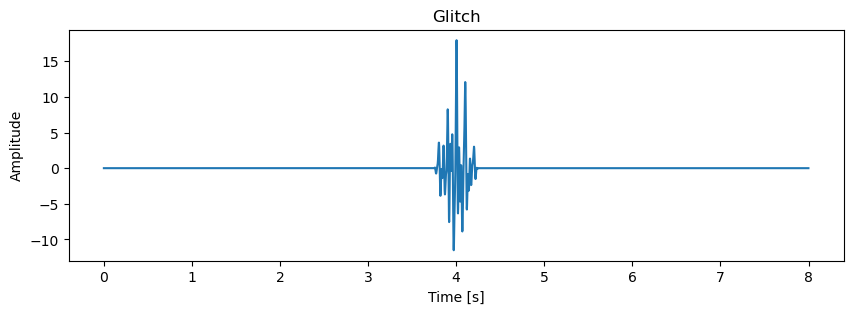

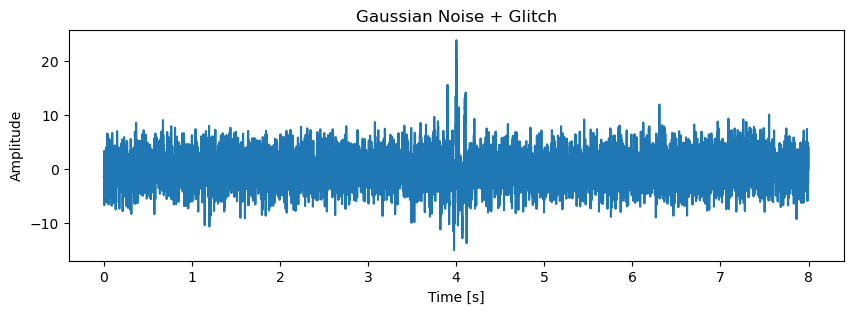

In [11]:
start = 0
end = 8
glitch_st = 3.75
glitch_ed = 4.25
loc = 0
scale = 1.5
fs = 1024

times, g_noise = gaussian(
    start=start,
    end=end,
    loc=loc,
    scale=scale,
)
plt.figure(figsize=[10,3])
plt.title(f"Gaussian Noise, mean={loc}, std={scale}")
plt.plot(times, g_noise)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

glitch_times, glitch = signal(
    start=glitch_st,
    end=glitch_ed,
    amplitudes=amplitudes,
    modes=modes,
    phases=phases,
)
window = np.bartlett(len(glitch))
glitch *= window
pad_earlier = int((glitch_st - start)*fs)
pad_later = int((end - glitch_ed)*fs)
pad_width = (pad_earlier, pad_later)
glitch = np.pad(glitch, pad_width=pad_width, mode='constant', constant_values=(0,0))
glitch *= 1.5
plt.figure(figsize=[10,3])
plt.title(f"Glitch")
plt.plot(times, glitch)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

noise = g_sig + glitch
plt.figure(figsize=[10,3])
plt.title(f"Gaussian Noise + Glitch")
plt.plot(times, noise)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

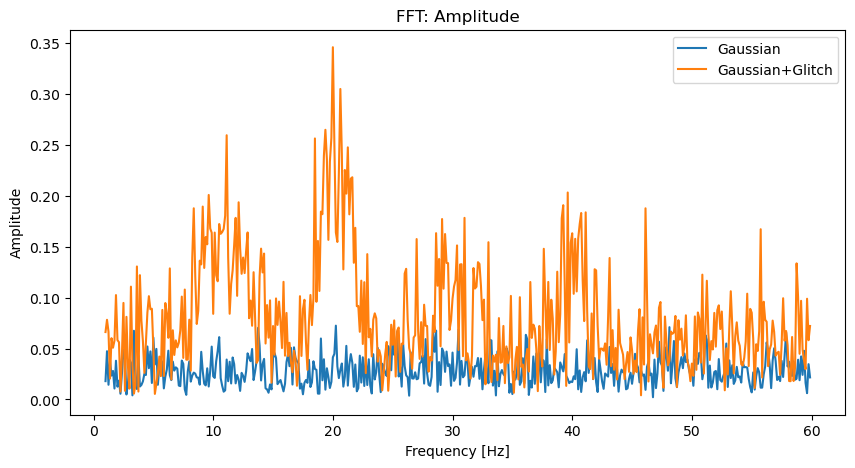

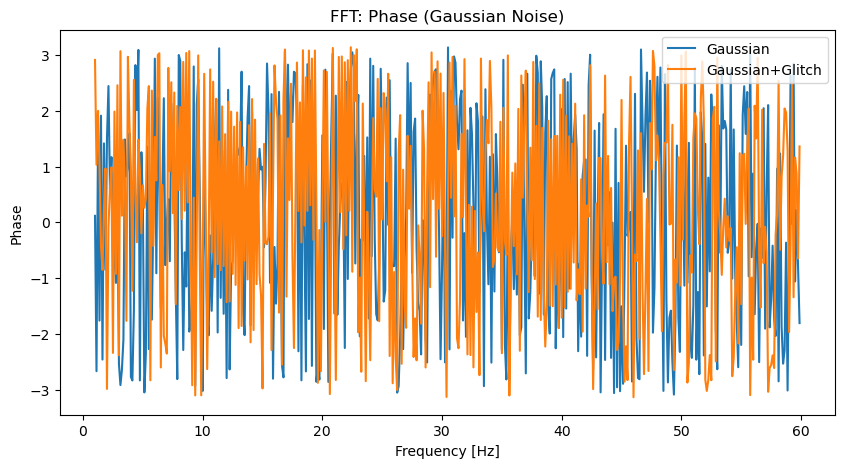

In [12]:
fs = 1024
g_noise_f = np.fft.rfft(g_noise)
# print(len(g_noise_f))
# print(g_noise_f)
noise_f = np.fft.rfft(noise)
# print(len(noise_f))
# print(noise_f)
df = 1/(len(times)/fs)

f_view = [1, 60]
frequencies = np.arange(0, fs/2 + df, df)
fst = int(f_view[0]/df)
fed = int(f_view[1]/df)
plt.figure(figsize=[10,5])
plt.title("FFT: Amplitude")
plt.plot(frequencies[fst:fed], np.abs(g_noise_f[fst:fed])/len(frequencies), label='Gaussian')
plt.plot(frequencies[fst:fed], np.abs(noise_f[fst:fed])/len(frequencies), label='Gaussian+Glitch')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

plt.figure(figsize=[10,5])
plt.title("FFT: Phase (Gaussian Noise)")
plt.plot(frequencies[fst:fed], np.angle(g_noise_f[fst:fed]), label='Gaussian')
plt.plot(frequencies[fst:fed], np.angle(noise_f[fst:fed]), label='Gaussian+Glitch')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase")
plt.legend()
plt.show()

## What's next?
1. System Setup
    - WSL
    - Bash
    - Python Environment
    - Git
2. Fetching Data
    - GWOSC
    - GWpy
    - PyCBC
3. Omicron and Q-transform
4. Machine Learning
    - Pytorch
    - Dataset
    - Model
    - Traning
    - Test

## Querying Science Segments

In [13]:
from gwosc.timeline import get_segments
from gwosc.locate import get_urls

In [15]:
detector = "H1"
sample_rate = 4096
format = "gwf"

start = 1256663442
end = 1256682798
segs = get_segments(f"{detector}_DATA", start, end)
print(segs)

start = segs[0][0]
end = segs[0][1]
print(start, end)

url = get_urls(
    detector=detector,
    start=start,
    end=end,
    sample_rate=sample_rate,
    format=format,
    host="https://gwosc.org",
)
print(url)

[(1256663443, 1256679418), (1256682796, 1256682798)]
1256663443 1256679418
['http://gwosc.org/archive/data/O3b_4KHZ_R1/1256194048/H-H1_GWOSC_O3b_4KHZ_R1-1256660992-4096.gwf', 'http://gwosc.org/archive/data/O3b_4KHZ_R1/1256194048/H-H1_GWOSC_O3b_4KHZ_R1-1256665088-4096.gwf', 'http://gwosc.org/archive/data/O3b_4KHZ_R1/1256194048/H-H1_GWOSC_O3b_4KHZ_R1-1256669184-4096.gwf', 'http://gwosc.org/archive/data/O3b_4KHZ_R1/1256194048/H-H1_GWOSC_O3b_4KHZ_R1-1256673280-4096.gwf', 'http://gwosc.org/archive/data/O3b_4KHZ_R1/1256194048/H-H1_GWOSC_O3b_4KHZ_R1-1256677376-4096.gwf']


In [16]:
import os
for i in url:
    os.system(f"wget {i}")

--2025-03-11 16:35:51--  http://gwosc.org/archive/data/O3b_4KHZ_R1/1256194048/H-H1_GWOSC_O3b_4KHZ_R1-1256660992-4096.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.72
Connecting to gwosc.org (gwosc.org)|131.215.113.72|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/archive/data/O3b_4KHZ_R1/1256194048/H-H1_GWOSC_O3b_4KHZ_R1-1256660992-4096.gwf [following]
--2025-03-11 16:35:51--  https://gwosc.org/archive/data/O3b_4KHZ_R1/1256194048/H-H1_GWOSC_O3b_4KHZ_R1-1256660992-4096.gwf
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Connecting to gwosc.org (gwosc.org)|131.215.113.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52724425 (50M) [application/octet-stream]
Saving to: ‘H-H1_GWOSC_O3b_4KHZ_R1-1256660992-4096.gwf’

     0K .......... .......... .......... .......... ..........  0%  150K 5m43s
    50K .......... .......... .......... .......... ..........  0%  280K 4m23s
   100K .......... .........

In [2]:
from gwpy.timeseries import TimeSeries

/home/jerry/miniforge3/envs/glitch-classification/lib/python3.10/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [ ]:
ifo = 'L1'
start = 1256655666
duration = 2073
end = start + duration
ts = TimeSeries.fetch_open_data(
    ifo=ifo,
    start=start,
    end=end,
    sample_rate=4096,
    format='gwf',
)

NameError: Failed to read GWOSC data from 'http://gwosc.org/archive/data/O3b_4KHZ_R1/1256194048/L-L1_GWOSC_O3b_4KHZ_R1-1256652800-4096.gwf': free variable 'libread_' referenced before assignment in enclosing scope

In [ ]:
ts.write(f"./Data/{ifo[0]}-{ifo}.gwf")